# Exploratory Data Analysis on Cardiotocographic Dataset

## 1. Data Cleaning and Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv("Cardiotocographic.csv")

In [2]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
print("Shape:", data.shape)
print("\nColumn types:\n", data.dtypes)
print("\nMissing values (before):\n", data.isnull().sum())

Shape: (2126, 14)

Column types:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

Missing values (before):
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [4]:
# Fill missing numeric values with median
data_clean = data.copy()
num_cols = data_clean.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    median_val = data_clean[c].median(skipna=True)
    data_clean[c] = data_clean[c].fillna(median_val)

In [5]:
# Replace negative numeric values (if not meaningful) with NaN then impute again
neg_mask = data_clean[num_cols] < 0
data_clean[num_cols] = data_clean[num_cols].mask(neg_mask)
for c in num_cols:
    median_val = data_clean[c].median(skipna=True)
    data_clean[c] = data_clean[c].fillna(median_val)

print("\nMissing values (after):\n", data_clean.isnull().sum())
data_clean.head()


Missing values (after):
 LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [6]:
# checking for outlier
outlier_report = {}
for c in data_clean.select_dtypes(include=[np.number]).columns:
    q1 = data_clean[c].quantile(0.25)
    q3 = data_clean[c].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    count_out = ((data_clean[c] < lower) | (data_clean[c] > upper)).sum()
    outlier_report[c] = int(count_out)

pd.Series(outlier_report).sort_values(ascending=False)

NSP         553
FM          340
ALTV        315
DP          232
DL          119
MLTV         78
MSTV         77
DS           67
AC           39
LB           10
UC            9
ASTV          5
Width         5
Tendency      4
dtype: int64

## 2️. Statistical Summary

In [7]:
summary = data_clean.describe().T
summary[['mean','50%','std','min','25%','75%','max']]

,mean,50%,std,min,25%,75%,max
LB,133.340204,133.000000,11.214379,51.842487,126.00000,140.000000,214.000000
AC,0.003264,0.001668,0.004251,0.000000,0.00000,0.005606,0.038567
FM,0.011275,0.000000,0.062290,0.000000,0.00000,0.002567,0.961268
UC,0.004447,0.004517,0.003220,0.000000,0.00199,0.006536,0.030002
DL,0.001939,0.000000,0.003215,0.000000,0.00000,0.003289,0.030769
DS,0.000007,0.000000,0.000117,0.000000,0.00000,0.000000,0.002706
DP,0.000184,0.000000,0.000801,0.000000,0.00000,0.000000,0.010695
ASTV,47.259390,49.000000,18.039875,11.799846,32.00000,61.000000,162.000000
MSTV,1.375385,1.200000,1.134804,0.200000,0.70000,1.700000,13.800000
ALTV,10.420514,0.000000,20.860775,0.000000,0.00000,11.000000,182.000000


# 3.Data Visualization
# Histograms

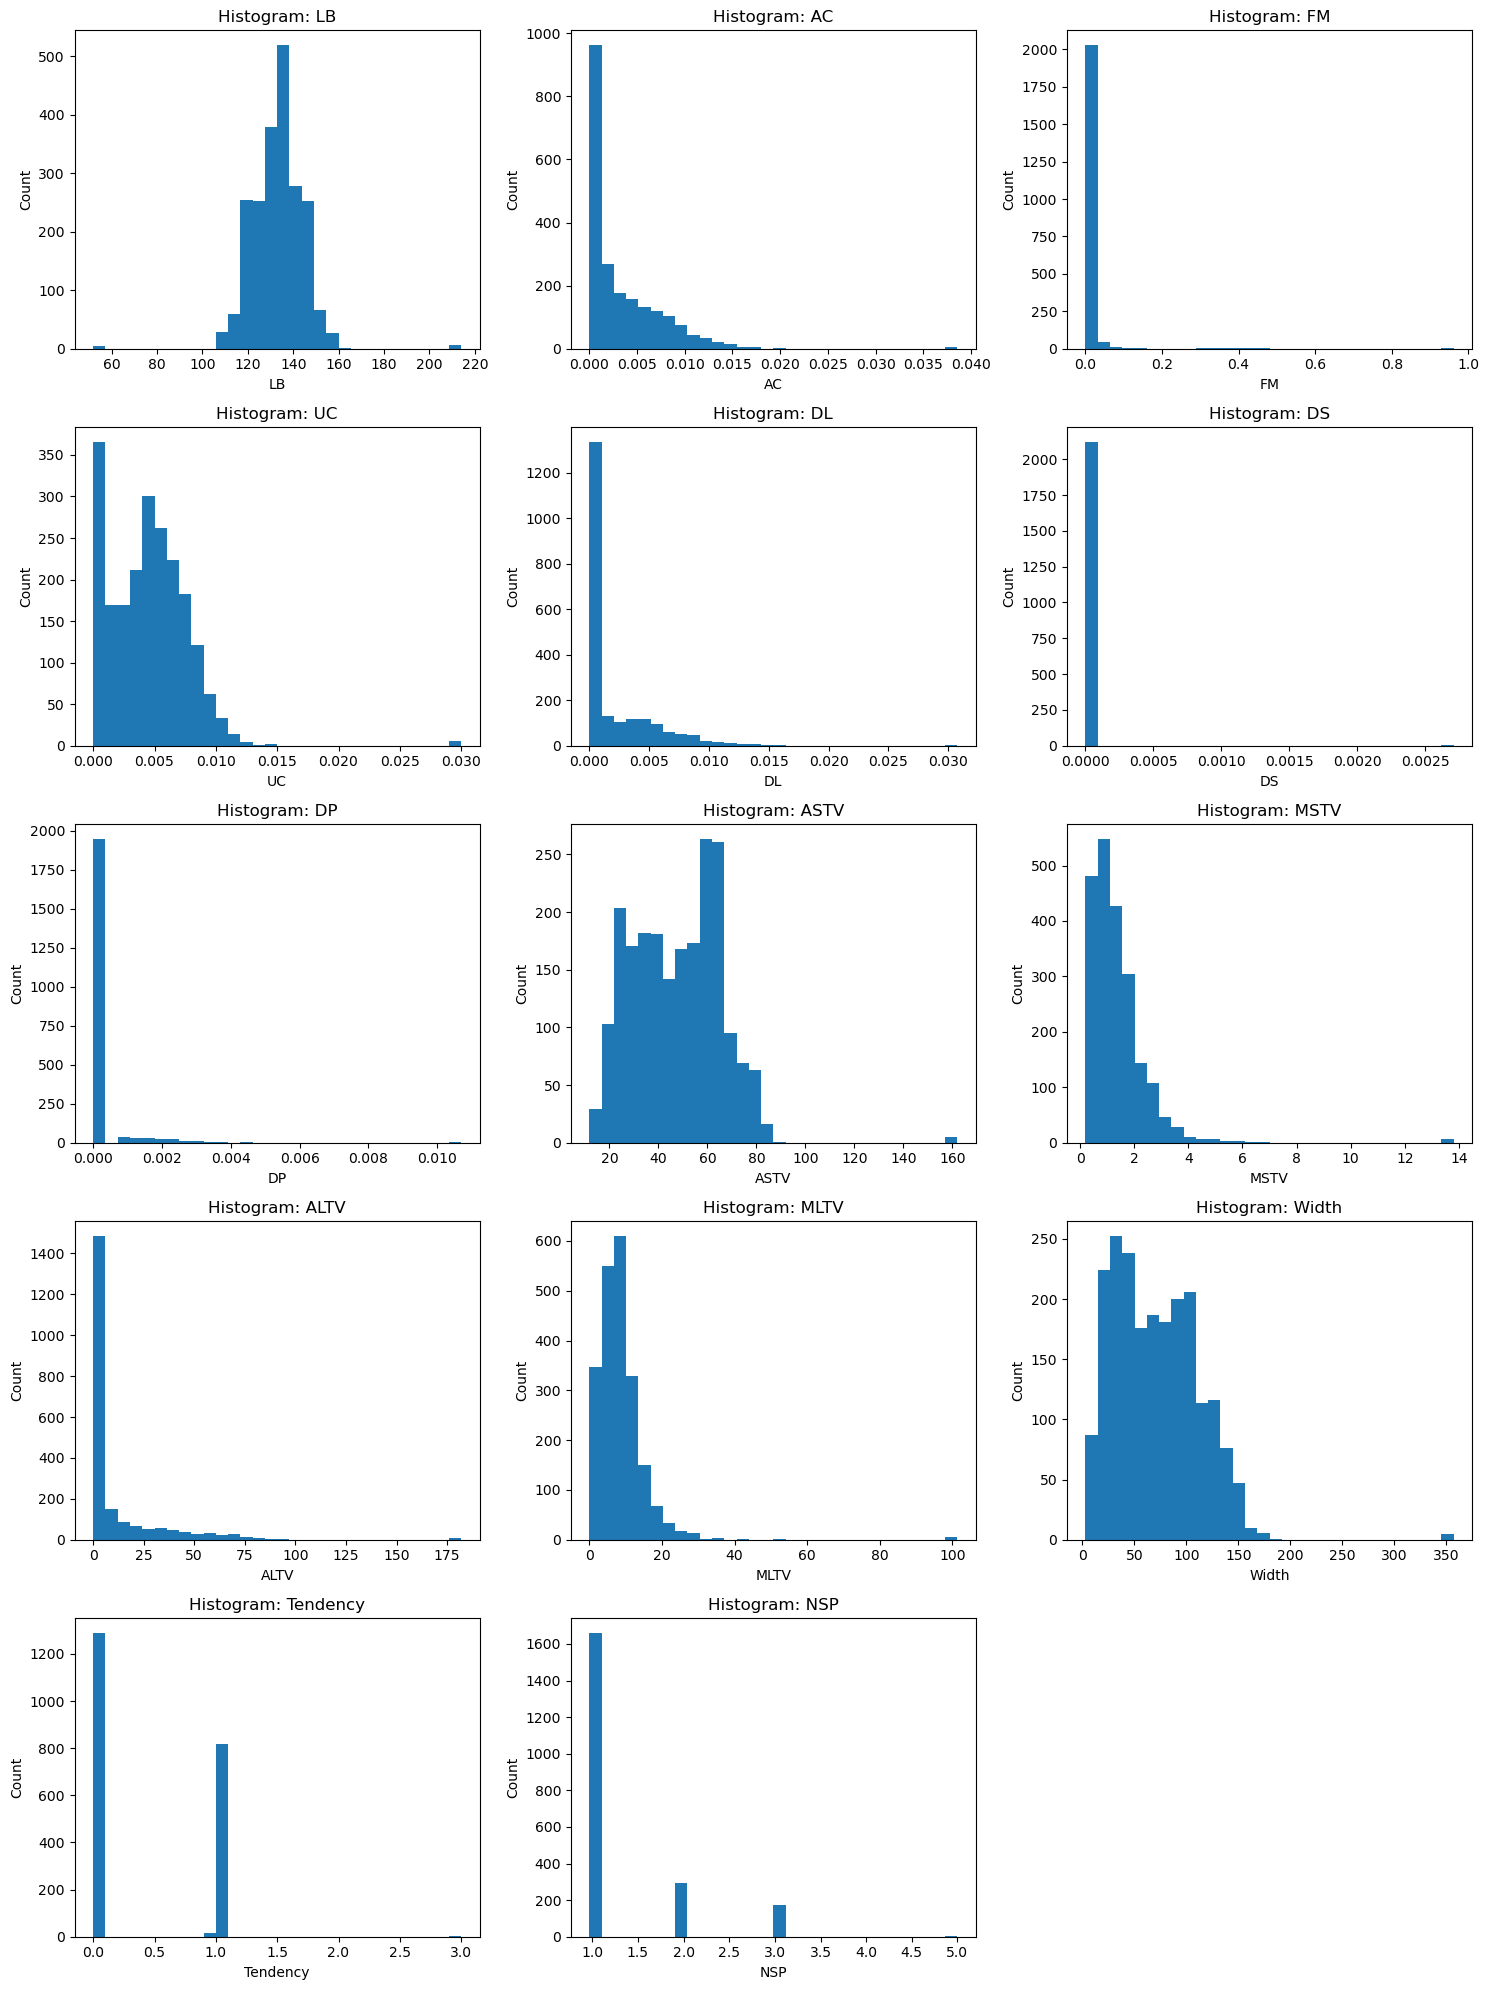

In [8]:
num_cols = data_clean.select_dtypes(include=[np.number]).columns.tolist()
n = len(num_cols)
cols = 3
rows = (n + cols - 1) // cols

fig_idx = 1
fig = plt.figure(figsize=(15, 4*rows))
for i, c in enumerate(num_cols, 1):
    ax = fig.add_subplot(rows, cols, i)
    ax.hist(data_clean[c].dropna(), bins=30)
    ax.set_title(f"Histogram: {c}")
    ax.set_xlabel(c)
    ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

# Boxplots (to check outliers)

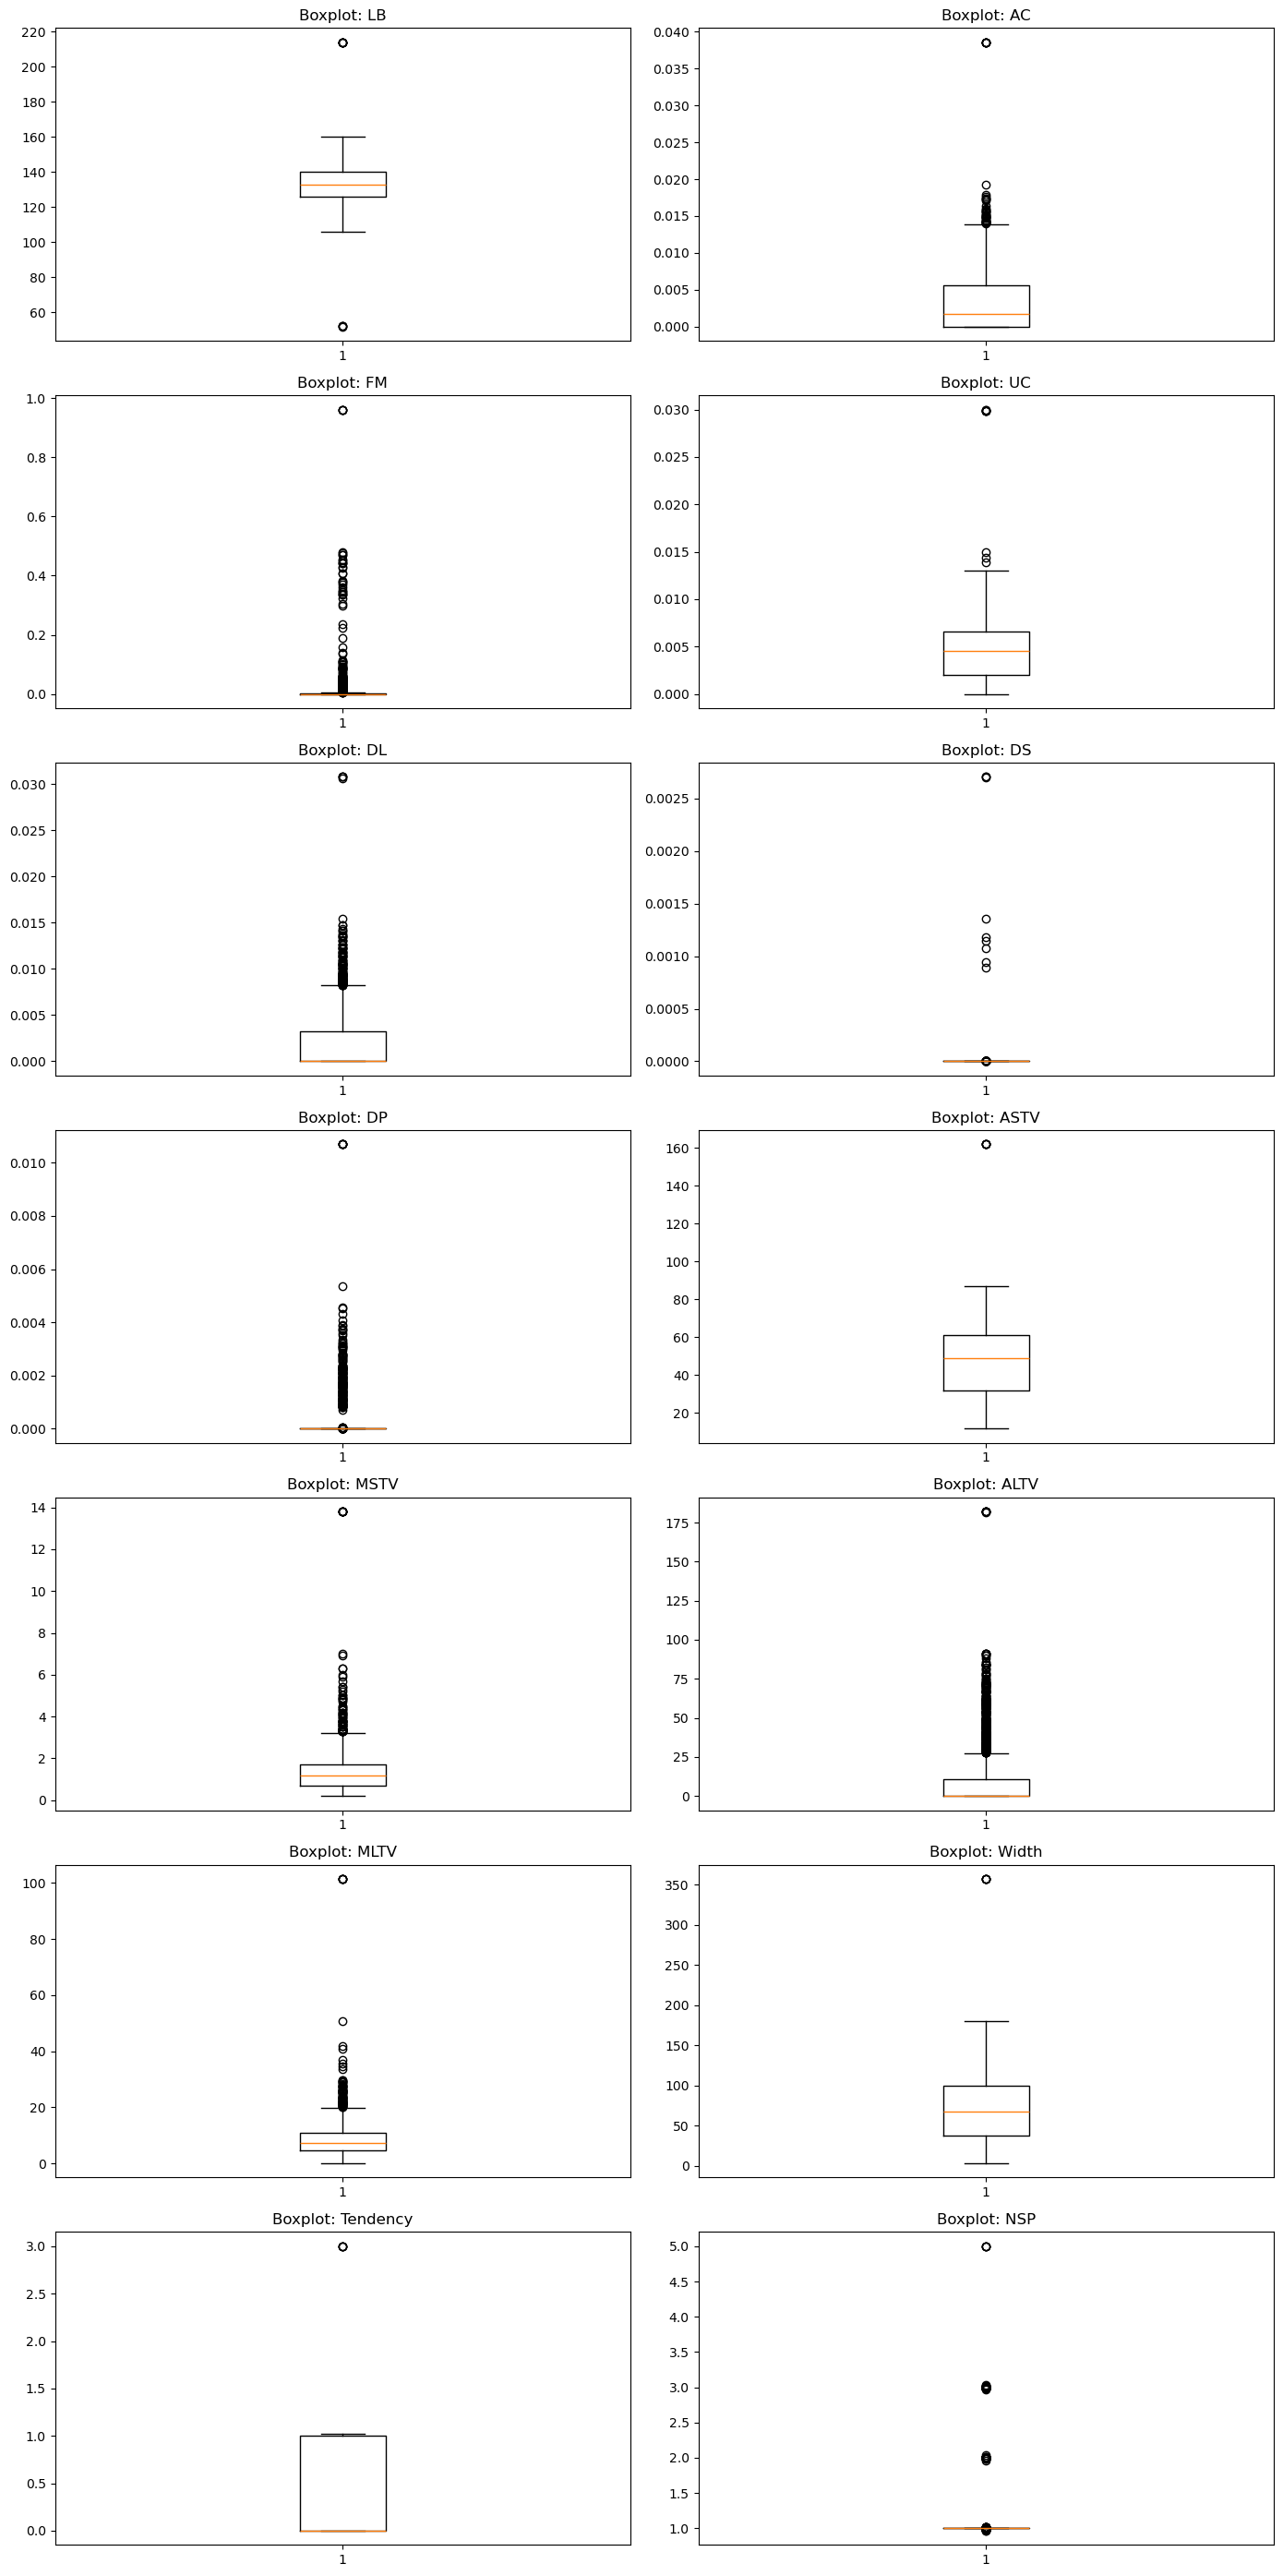

In [9]:
import math

n = len(num_cols)
cols = 2
rows = math.ceil(n/cols)

fig = plt.figure(figsize=(14, 4*rows))
for i, c in enumerate(num_cols, 1):
    ax = fig.add_subplot(rows, cols, i)
    ax.boxplot(data_clean[c].dropna(), vert=True)
    ax.set_title(f"Boxplot: {c}")
plt.tight_layout()
plt.show()

# Target Variable Distribution (NSP)

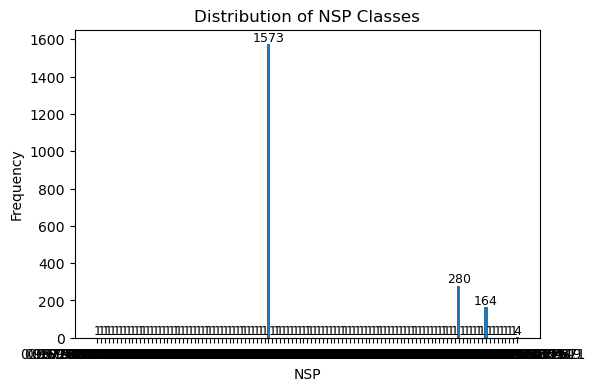

In [10]:
if 'NSP' in data_clean.columns:
    counts = data_clean['NSP'].value_counts().sort_index()
    plt.figure(figsize=(6,4))
    plt.bar(counts.index.astype(str), counts.values)
    plt.title("Distribution of NSP Classes")
    plt.xlabel("NSP")
    plt.ylabel("Frequency")
    for i, v in enumerate(counts.values):
        plt.text(i, v, str(v), ha='center', va='bottom', fontsize=9)
    plt.show()
else:
    print("NSP column not found.")

# Correlation Heatmap

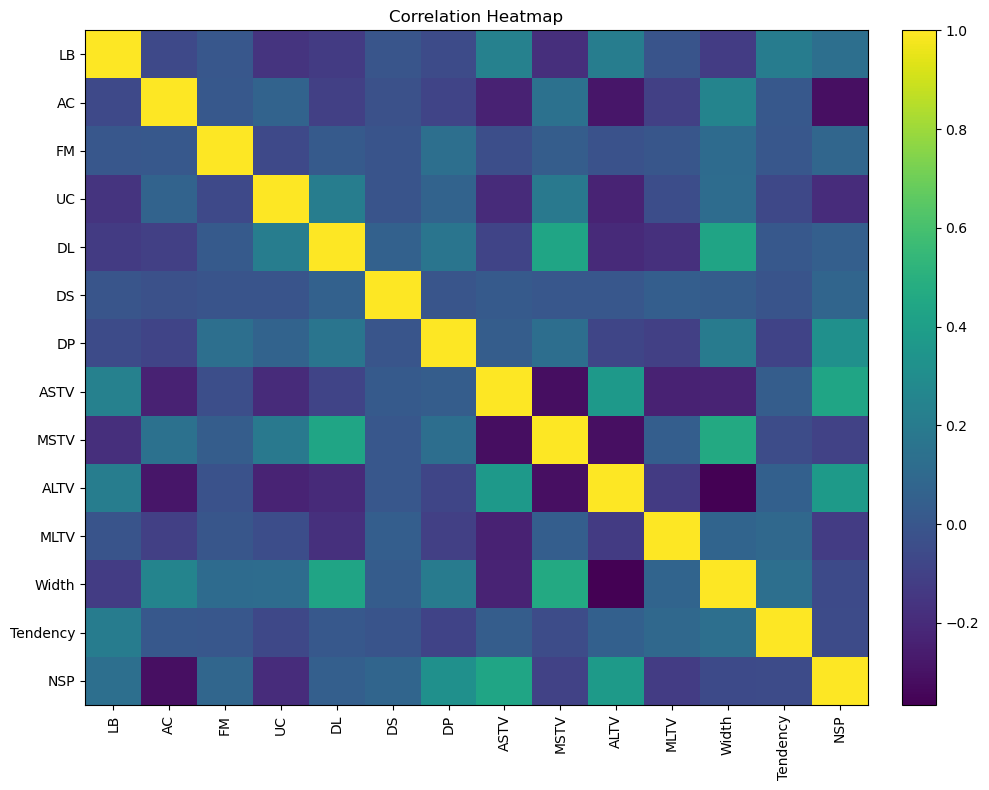

In [11]:
corr = data_clean.corr(numeric_only=True)
plt.figure(figsize=(10,8))
im = plt.imshow(corr, aspect='auto')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Scatter Plot 

C:\Users\rajku\AppData\Local\Temp\ipykernel_2852\248025957.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


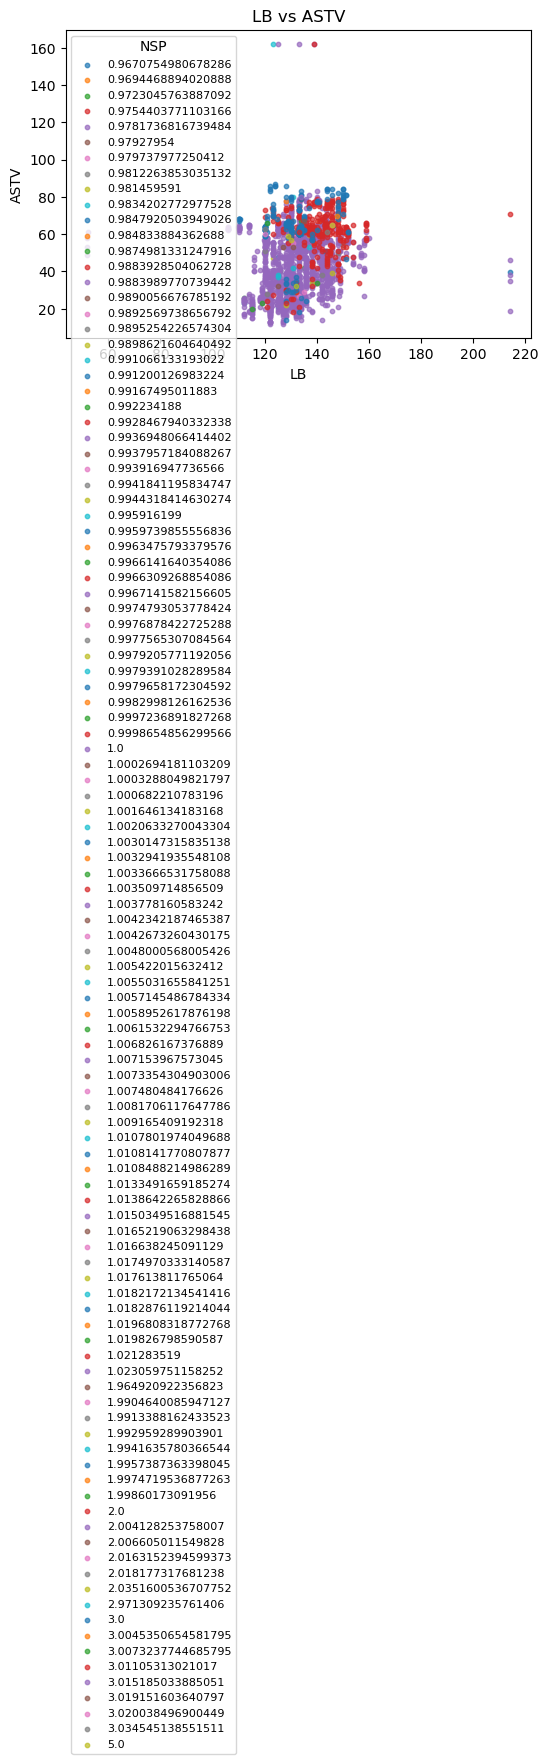

In [12]:
x_col, y_col = 'LB', 'ASTV'
if x_col in data_clean.columns and y_col in data_clean.columns:
    plt.figure(figsize=(6,4))
    if 'NSP' in data_clean.columns:
        for cls in sorted(data_clean['NSP'].unique()):
            subset = data_clean[data_clean['NSP']==cls]
            plt.scatter(subset[x_col], subset[y_col], label=str(cls), s=10, alpha=0.7)
        plt.legend(title='NSP', fontsize=8)
    else:
        plt.scatter(data_clean[x_col], data_clean[y_col], s=10, alpha=0.7)
    plt.title(f"{x_col} vs {y_col}")
    plt.xlabel(x_col); plt.ylabel(y_col)
    plt.tight_layout()
    plt.show()
else:
    print("Columns for scatter not found.")

# Pair Plot

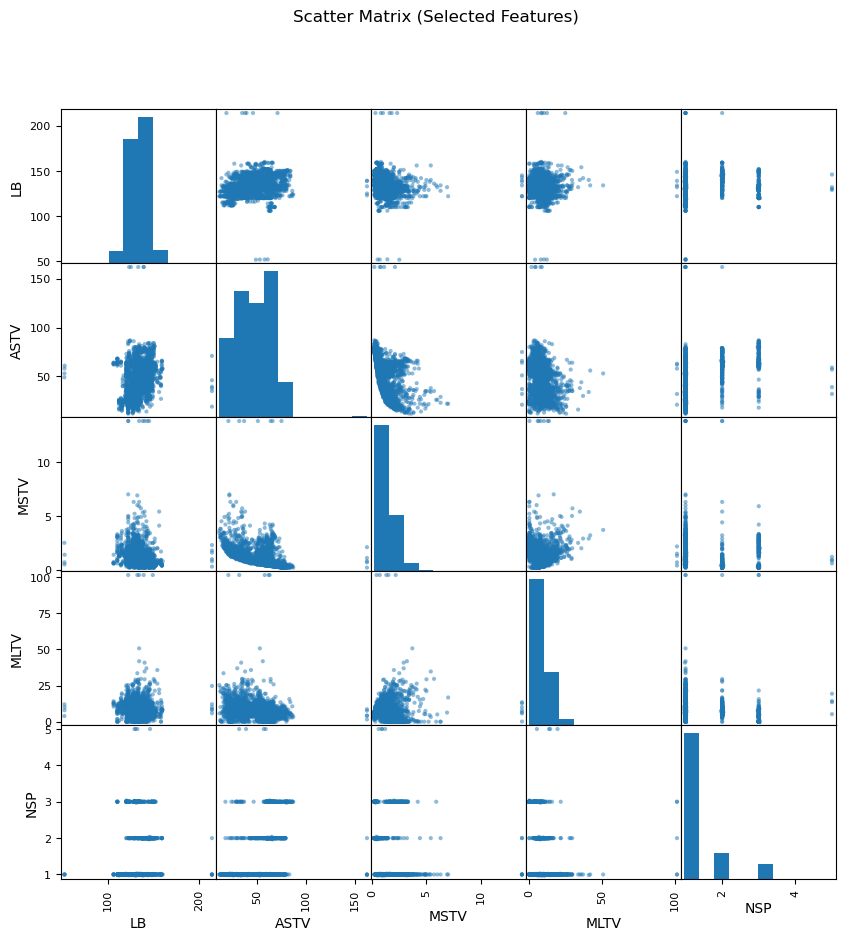

In [13]:
from pandas.plotting import scatter_matrix

features = [c for c in ['LB','ASTV','MSTV','MLTV','NSP'] if c in data_clean.columns]
if 'NSP' in features:
  
    df_plot = data_clean[features].copy()
    
    if 'NSP' in df_plot.columns:
        df_plot['NSP_size'] = (df_plot['NSP'] - df_plot['NSP'].min() + 1) * 5
    axes = scatter_matrix(df_plot.drop(columns=[c for c in ['NSP_size'] if c in df_plot.columns]), figsize=(10,10), diagonal='hist')
    plt.suptitle("Scatter Matrix (Selected Features)")
    plt.show()
else:
    axes = scatter_matrix(data_clean[[c for c in features if c!='NSP']], figsize=(10,10), diagonal='hist')
    plt.suptitle("Scatter Matrix (Selected Features)")
    plt.show()

# 4.Pattern Recognition and Insights

- features like ASTV, MSTV, ALTV, MLTV show stronger links with NSP.
- Most records tends to bee in NSP = 1, which considered normal 
- Some fetures have outliers; treated carfully before modeling.
- Combined fetures for better understanding.


# 5. cunclusion

- As given the data is cleaned, missing values handled, negatives imputed.
- Summary and visuals give a clear picture of distributions and relationships.
- Variability related features are key signals for fetal status (NSP).
- Not it is ready for next steps eature selection and modeling.